# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

* If Jupyter-lab does not work for you, you can also use Google Colab to write the code and export the pdf file.

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [55]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter.

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

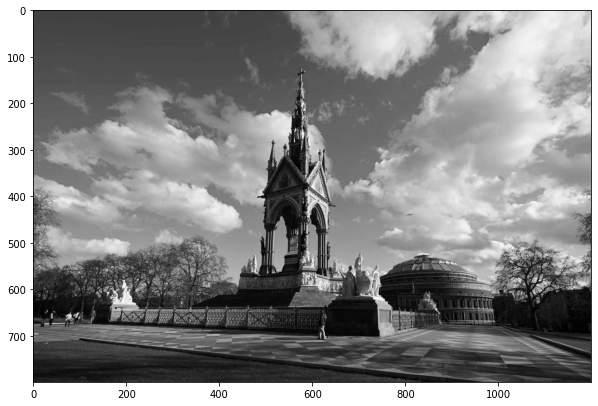

In [56]:
# Read the image (provided)
image = imageio.imread('.\coursework_01\hyde_park.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

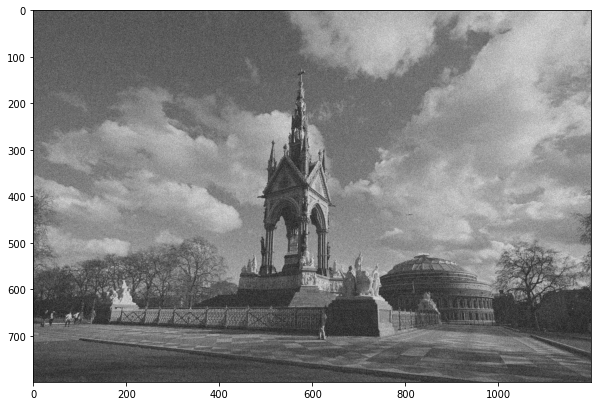

In [57]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


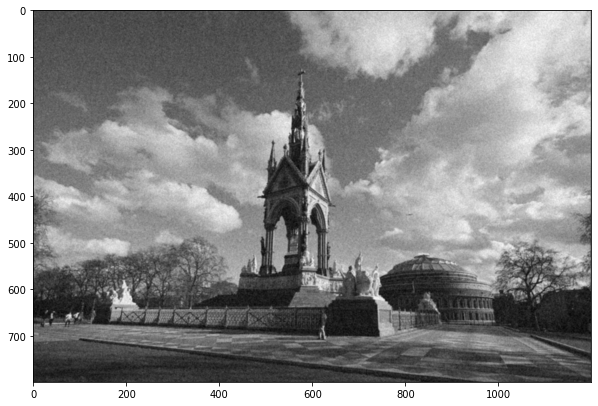

In [58]:
# Design the filter h
h = 1/9*np.ones((3,3))
# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode = 'same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

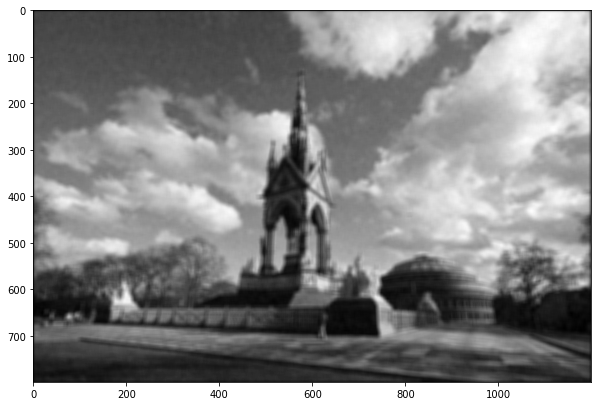

In [59]:
# Design the filter h
h = (1/11**2)*np.ones((11,11))

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')


# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

The larger the kernel size, the more blurry the filtering results, this is because the average is being applied across a wider space so the blur is wider. If the krenel size is too wide, then the resulting image is poorly refined, however if there kernel size is too small, then the resulting image is too susceptible to noise, so an intermediate value should be sought.

## 2. Edge detection.

Perform edge detection using Prewitt filtering, as well as Gaussian + Prewitt filtering.

### 2.1 Implement 3x3 Prewitt filters and convolve with the noisy image. (10 points)

prewitt_x:
[[1, 0, -1], [1, 0, -1], [1, 0, -1]]
prewitt_y:
[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]


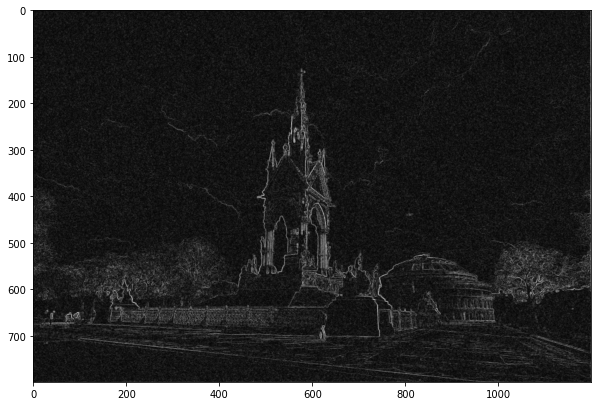

In [60]:
# Design the Prewitt filters
prewitt_x = [[1, 0, -1],[1, 0, -1],[1, 0, -1]]
prewitt_y = [[1, 1, 1], [0, 0, 0],[-1, -1, -1]]

# Prewitt filtering
image_filtered_x = scipy.signal.convolve2d(image_noisy, prewitt_x, mode='same')
image_filtered_y = scipy.signal.convolve2d(image_noisy, prewitt_y, mode='same')

# Calculate the gradient magnitude
grad_mag = np.sqrt(image_filtered_x**2 + image_filtered_y**2)

# Print the filters (provided)
print('prewitt_x:')
print(prewitt_x)
print('prewitt_y:')
print(prewitt_y)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

(19, 19)

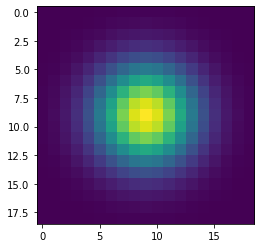

In [74]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    sz = 6*sigma+1
    kernel_1D = np.linspace(-3*sigma, 3*sigma, sz) # only include before 3*sigma
    kernel_2D = np.zeros((sz,sz))
    for i in range(sz):
        for j in range(sz):
            kernel_2D[i,j] = np.exp(-(kernel_1D[i]**2+kernel_1D[j]**2)/(2*sigma**2))/(2*np.pi*sigma**2) 
    return kernel_2D

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Prewitt filtering, show the gradient magnitude image. (5 points)

(799, 1200)

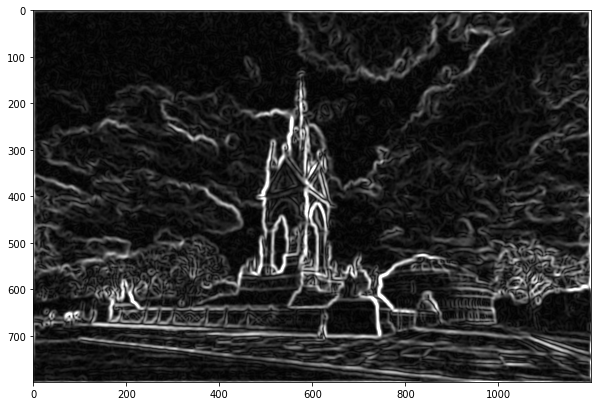

In [72]:
# Perform Gaussian smoothing before Prewitt filtering
smoothed_image = scipy.signal.convolve2d(image_noisy, gaussian_filter_2d(3), mode='same')
plt.imshow(smoothed_image, cmap = 'gray')

# Prewitt filtering
image_filtered_x = scipy.signal.convolve2d(smoothed_image, prewitt_x, mode='same')
image_filtered_y = scipy.signal.convolve2d(smoothed_image, prewitt_y, mode='same')

# Calculate the gradient magnitude
grad_mag = np.sqrt(image_filtered_x**2 + image_filtered_y**2)


# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)


### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Prewitt filtering. (7 points)

(43, 43)
Guassian 2D computational time = 8.198890447616577


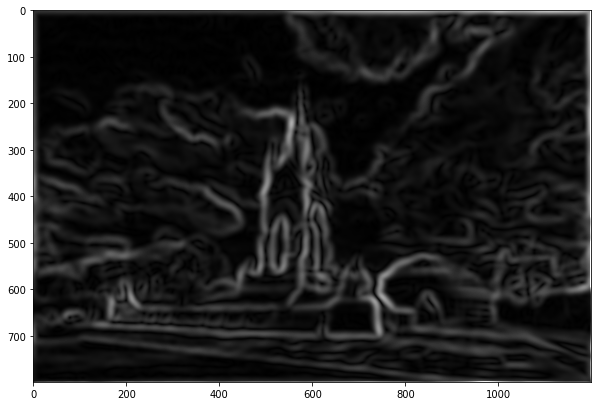

In [84]:
sigma = 7
print(gaussian_filter_2d(sigma).shape)
# Perform Gaussian smoothing before Prewitt filtering
start = time.time()
smoothed_image = scipy.signal.convolve2d(image_noisy, gaussian_filter_2d(sigma), mode="same")
end = time.time()
print(f"Guassian 2D computational time = {end-start}")
plt.imshow(smoothed_image, cmap = 'gray')
# Prewitt filtering
image_filtered_x = scipy.signal.convolve2d(smoothed_image, prewitt_x, mode="same")
image_filtered_y = scipy.signal.convolve2d(smoothed_image, prewitt_y, mode="same")
# print("Image filtered y shape = ", image_filtered_y.shape)
# Calculate the gradient magnitude
grad_mag = np.sqrt(np.square(image_filtered_x) + np.square(image_filtered_y))


# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)


### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

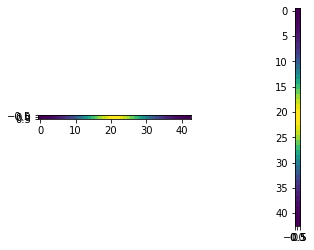

In [68]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    kernel_1D = np.linspace(-3*sigma, 3*sigma, 6*sigma+1) # only include before 3*sigma 
    for i in range(6*sigma+1):
        kernel_1D[i] = np.exp(-kernel_1D[i]**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
    return kernel_1D

# sigma = 7 pixel (provided)
sigma = 7
sz = 6*sigma+1
# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma).reshape(1, sz)
# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma).reshape(sz,1)

len(h_y)
# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)


### 2.6 Perform Gaussian smoothing ($\sigma$ = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Prewitt filtering, show results and check whether the results are the same as the previous one without separable filtering. (9 points)

Time for two separable guassian filters = 0.577613353729248
Mean difference between both methods = 1.7578762289013796e-15


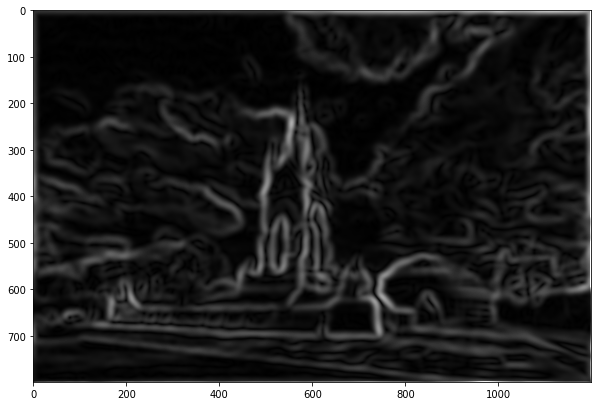

In [87]:
# Perform separable Gaussian smoothing and count time
# The Gaussian filter along x-axis
start = time.time()
smoothed_x = scipy.signal.convolve2d(image_noisy, h_x, mode="same")

# Convolve along y axis.
smoothed_image = scipy.signal.convolve2d(smoothed_x, h_y, mode="same")
end = time.time()
print(f"Time for two separable guassian filters = {end-start}")
# Prewitt filtering
image_filtered_x = scipy.signal.convolve2d(smoothed_image, prewitt_x, mode="same")
image_filtered_y = scipy.signal.convolve2d(smoothed_image, prewitt_y, mode="same")

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(image_filtered_x**2+image_filtered_y**2)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
print(f"Mean difference between both methods = {np.mean(grad_mag2-grad_mag)}")

### 2.7 Comment on the Gaussian + Prewitt filtering results and the computational time. (9 points)

Firstly, the guassian filtering produces poort results - the output is too blurry and the edges are poorly refined, it is better to use a smaller filter (i.e. sigma=3). The prewitt filter is relatively effective at edge detection although it picks up a lot edges from the clouds which may not be desirable - a Canny filter could be tested to compare results.

The computational time for 2 separable filters is far smaller than for a 2D convolution (~16x smaller) which is consistent with what we understand about separable filters

## 3. Challenge: Implement a 2D Gaussian filter using Pytorch.

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [15]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (7 points)

In [101]:
# Expand the dimension of the numpy array
# torch.reshape(image_noisy, (1, 1, image_noisy.shape[0],image_noisy.shape[1]))
image_noisy_reshaped = image_noisy.reshape((1, 1, image_noisy.shape[0], image_noisy.shape[1]))

# Convert to a Pytorch tensor using torch.from_numpy
image_noisy_torch = torch.from_numpy(image_noisy_reshaped)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter. (7 points)

In [103]:
# A 2D Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)

# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(1,1,(6*sigma+1,6*sigma+1))

# Set the kernel weight
conv.weight = torch.nn.Parameter(torch.from_numpy(h.reshape((1,1,h.shape[0],h.shape[1]))))

### 3.3 Apply the filter to the noisy image tensor and display the output image. (6 points)

In [124]:
# Filtering
image_filtered = conv(image_noisy_torch)
image_filtered
# Display the filtering result (provided)
plt.imshow(image_filtered[0,0,:,:].detach().numpy(), cmap='gray')
plt.gcf().set_size_inches(10, 8)

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:76] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2666034096 bytes.

## 4. Survey: How long does it take you to complete the coursework?